# logistic regression

## 一、概念

逻辑回归是应用于**二分类**的方法。相对的应用于多分类的方法叫softmax。

逻辑回归的实现依赖于sigmoid函数：

$$
y = \frac{1}{1+e^{-z}}
\tag{1}
$$

可以看出这是一个单调递增，当x趋向于负无穷时函数值趋向于0，x趋向于正无穷时函数值趋向于1，对应于某一样本属于某一类的概率。

对于一个有p个变量的样本而言，模型的形式为：

$$
\hat y_i = P(y_i = 1) = \frac{1}{1+e^{-(\theta_0 + \theta_1 x_1+...+\theta_p x_p)}}
\tag{2}
$$

## 二、损失函数

逻辑回归的损失函数是交叉熵，从数理统计的角度出发，则是极大似然函数。

假设样本来自于伯努利分布，$y_i\in \{ 0, 1\}$，对概率的估计值$\hat y_i\in (0,1)$，则估计的似然函数是：

$$
L =\prod_{i=1}^n {\hat {y_i}}^{y_i}(1-\hat {y_i})^{1-{y_i}}
\tag{3}
$$

对其求以自然底数为底数的对数：

$$
ln(L) = \sum_{i=1}^n (y_i ln(\hat {y_i})+(1-{y_i})ln(1-\hat {y_i}))
$$

根据极大似然估计的定义，似然函数的函数值越大，表示随机事件更可能服从当前的概率分布。
由于伯努利分布的似然函数值在0，1之间，取对数后不改变增减性，极大化似然函数则等价于极小化损失函数。

因此损失函数就定义为：

$$
loss = -\frac 1 n\sum_{i=1}^n y_i ln(\hat {y_i})+(1-{y_i})ln(1-\hat {y_i}))
\tag{4}
$$

## 三、优化

和多元线性回归类似，逻辑回归也存在相应假定

尽管逻辑回归的形式像是把多元线性回归套进sigmoid函数，但逻辑回归没有像多元线性回归那样的正规方程（据我所知没有），因此逻辑回归的参数求解和优化主要靠梯度下降。

梯度下降的核心在于求导，样本为常数，参数为变量，把损失函数视为参数的函数对其求导。

首先，由于真实值已知，所以损失函数是关于估计值的函数：

$$
\frac{\partial loss}{\partial \hat y_i} = -\frac {1}{n}(\frac {y_i}{\hat y_i} - \frac{1-y_i}{1-\hat y_i})
\tag{5}
$$

而$\hat y_i$是数据各变量线性组合$z_i$的sigmoid函数：

$$
\begin{split}
    \hat y_i &= \frac{1}{1+e^{-z_i}} \\
    \\
    \frac{\partial \hat y_i}{\partial z_i} &= \frac{e^{-z_i}}{(1+e^{-z_i})^2} = \frac{1}{1+e^{-z_i}}(1-\frac{1}{1+e^{-z_i}})=\hat y_i(1-\hat y_i)\\
    \\
    z_i &= \theta_0 + \theta_1 x_1+...+\theta_p x_p \\
    \\
    \frac{\partial z_i}{\partial \theta_j} &= x_{ij}
\end{split}
$$

接下来求梯度有两种方法：
1. 求分量的导数：
$$
\frac{\partial loss}{\partial \theta_j} = \sum_{i=1}^n \frac{\partial loss}{\partial \hat y_i} \frac{\partial \hat y_i}{\partial z_i} \frac{\partial z_i}{\partial \theta_j} = \frac 1 n \sum_{i=1}^n(\hat y_i - y_i)x_{ij} \\
$$
然后迭代：
$$
\theta_j := \theta_j - step\times\frac 1 n \sum_{i=1}^n(\hat y_i - y_i)x_{ij}
$$
2. 直接求梯度矩阵

损失是一个标量，$\hat y_i$，$z_i$和$\Theta$分别是$n\times 1$，$n\times 1$和$p\times 1$维向量，根据雅可比（Jacob）矩阵的定义，最终的梯度$\frac {\triangledown loss}{\triangledown \Theta}$应该是一个$p\times 1$维的向量。

首先，损失对估计值向量的导数（梯度）是一个雅可比矩阵：

$$
\frac{\triangledown loss}{\triangledown \hat Y} = 
\begin{bmatrix}
\frac{\partial loss}{\partial \hat y_1} \\
\frac{\partial loss}{\partial \hat y_2} \\
... \\
\frac{\partial loss}{\partial \hat y_n}
\end{bmatrix} =
\begin{bmatrix}
-\frac {1}{n}(\frac {y_1}{\hat y_1} - \frac{1-y_1}{1-\hat y_1}) \\
-\frac {1}{n}(\frac {y_2}{\hat y_2} - \frac{1-y_2}{1-\hat y_2}) \\
... \\
-\frac {1}{n}(\frac {y_n}{\hat y_n} - \frac{1-y_n}{1-\hat y_n})
\end{bmatrix}
$$

其次，$\hat Y$和$Z$的函数关系是分量之间的函数关系，于是：

$$
\frac{\triangledown \hat Y}{\triangledown Z} = 
\begin{bmatrix}
\hat y_1(1-\hat y_1)\\
\hat y_2(1-\hat y_2)\\
...\\
\hat y_n(1-\hat y_n)
\end{bmatrix}
$$

然后，$Z=X\Theta$需要求矩阵对矩阵的导数，其中的数学很复杂，我比较赞成的是这个方法：https://www.zhihu.com/question/39523290/answer/100057066 ，即导数的矩阵形式按需自取，也可以说是“凑”，先前求得的导数都是$n\times1$维的，因此只需一个$p\times n$维的矩阵参与，即可求得合适的梯度，即：

$$
\frac{\triangledown Z}{\triangledown \Theta} = X^T
$$

总结起来：

$$
\frac{\triangledown loss}{\triangledown \Theta} = \frac{\triangledown Z}{\triangledown \Theta}(\frac{\triangledown loss}{\triangledown \hat Y}*\frac{\triangledown \hat Y}{\triangledown Z}) = X^T\begin{bmatrix}
-\frac 1 n (y_1 - \hat y_1)\\
-\frac 1 n (y_2 - \hat y_2)\\
...\\
-\frac 1 n (y_n - \hat y_n)
\end{bmatrix}
$$

其中\*是按元素相乘。

最后按照梯度下降的定义进行迭代即可。

## 四、训练实例1

选用的是数据集是经典的鸢尾花数据集：http://archive.ics.uci.edu/ml/datasets/Iris ，一共五列变量，分别是花萼长度、花萼宽度、花瓣长度、花瓣宽度和鸢尾花的品种，数据简洁易于快速应用算法。

In [1]:
import numpy as np
import pandas as pd

cols = ['sepal.l','sepal.w','petal.l','petal.w','class']
iris = pd.read_csv('data_set/Iris.data', header=None, names=cols)
iris.insert(0, 'bias', 1)
iris.head(5)

,bias,sepal.l,sepal.w,petal.l,petal.w,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,1,4.7,3.2,1.3,0.2,Iris-setosa
3,1,4.6,3.1,1.5,0.2,Iris-setosa
4,1,5.0,3.6,1.4,0.2,Iris-setosa


Iris数据集中有三类花的数据，logistic regression适用于二分类，因此我们从Iris中选取两种花的数据作为训练数据。

In [2]:
iris.index = iris['class']
iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [3]:
iris = iris.loc[['Iris-setosa', 'Iris-versicolor'],:]
iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

In [4]:
n = iris.shape[0] # 样本数
p = iris.shape[1]-1 # 变量数

np.random.seed(2099)
index = np.random.permutation(n) # 打乱样本索引

train_index = index[0: int(0.7*n)]
test_index = index[int(0.7*n): n]

y = iris['class']
y = y=='Iris-setosa'
x = iris.drop(['class'], axis=1)

train_x = x.iloc[train_index]
train_y = y.iloc[train_index]
test_x = x.iloc[test_index]
test_y = y.iloc[test_index]

train_y = np.array(train_y).reshape([int(0.7*n), 1])
test_y = np.array(test_y).reshape([n-int(0.7*n), 1])

In [5]:
def initialize(p):
    return np.random.randn(p).reshape([p, 1])

theta = initialize(p)
print(theta)

[[-0.24336871]
 [-1.07204116]
 [-0.06854123]
 [-0.44725433]
 [ 0.4089976 ]]


In [6]:
def sigmoid(x, theta):
    return 1/(1 + np.exp(-np.dot(x, theta)))

train_y_hat = sigmoid(train_x, theta)
# print(train_y_hat)

In [7]:
def loss(y, y_hat):
    n = y.shape[0]
    return -1/n*(np.dot(y.T, np.log(y_hat)) + np.dot(1-y.T, np.log(1-y_hat)))

train_loss = loss(train_y, train_y_hat)
print(train_loss)

[[3.31128951]]


In [8]:
def train(y, x, theta, step=0.1, delta = 0.0001):
    decay = 1
    loss_pre = None
    loss_aft = float('inf')
    y_hat = sigmoid(x, theta)
    n = x.shape[0]
    while decay > delta:
        gradient = np.dot(x.T, 1/n*(y_hat - y))
        
        theta -= step*gradient
        y_hat = sigmoid(x, theta)
        
        loss_pre = loss_aft
        loss_aft = loss(y, y_hat)
        decay = loss_pre-loss_aft
        
        #print(decay)
    
    return theta, loss_aft

theta, train_loss = train(train_y, train_x, theta)
print(train_loss)

[[0.02657989]]


In [9]:
test_y_hat = sigmoid(test_x, theta)
test_loss = loss(test_y, test_y_hat)
print(test_loss)

[[0.03144648]]


## 五、阈值和评价指标

在分类问题中，我们求出的估计值通常是一个概率值，是属于0到1的连续实数$(0,1)$，而真实值的取值集合$\{ 0, 1\}$。
因此我们通常需要选取阈值，即确定概率值大于多少时认为取值是1，反之取值为0。
同时，直接的损失函数并不直观，通常我们还用准确率和一些其他评价指标。

### 1.阈值的选取

### 2.评价指标

最常见的评价指标是准确率，$accuracy = \frac 1 n \sum_{i=1}^n I(\hat y_i = y_i)$，准确率非常直观，即预测结果正确的占比。

尽管准确率较直观，但仍然有些粗糙，除了准确率之外我们还有查准率、召回率和F1分数作为评价指标。

| 混淆矩阵 | 预测正例-1  | 预测反例-0  |
|----------|:-----------:|:-----------:|
| 真实正例 | TP（真正例）| FN（假反例）|
| 真实反例 | FP（假正例）| TN（真反例）|

- TP：预测为真，实际为真
- FP：预测为真，实际为假
- FN：预测为假，实际为真
- TN：预测为假，实际为假

查准率： $P = precision = \frac{TP}{TP + FP}$

召回率： $R = recall = \frac{TP} {TP + FN}$

F1分数则是二者的调和平均数：$F1 = \frac{2}{\frac 1 P + \frac 1 R}$

根据不同的问题选用不同的指标是较为明智的选择，譬如犯罪嫌疑人识别，我们希望尽可能多得识别，即模型判断是犯罪嫌疑人的人数占所有犯罪嫌疑人人数的比例尽可能高，此时选用查准率；而疾病检测则不同，误诊会给病人带来极大的困扰，因此我们“希望”诊断患有某种疾病的人“确实”患有该疾病，此时选用召回率更合适；但也有很多情况中，并没有明显的偏好，因此选用F1分数将会是能够兼顾二者的一个较好选择

In [10]:
def accuracy(y, y_hat, threshold=0.5):
    y_hat = y_hat > threshold
    return np.sum(y == y_hat)/y.shape[0]

train_y_hat = sigmoid(train_x, theta)
train_accuracy = accuracy(train_y, train_y_hat)
test_accuracy = accuracy(test_y, test_y_hat)

print('accuracy on train set:'+str(train_accuracy))
print('accuracy on test set:'+str(test_accuracy))

accuracy on train set:1.0
accuracy on test set:1.0


由于数据量较少，纬度较低，因此准确率较高，下面计算查准率、召回率和F1分数（尽管根据准确率来看，三者肯定都是1）。

In [11]:
def precision(y, y_hat):
    TP_FP_index = np.where(y_hat == 1)[0]
    TP_FP = len(TP_FP_index)
    
    TP = np.sum(y_hat[TP_FP_index] == y[TP_FP_index])
    
    return TP/TP_FP

test_y_hat = test_y_hat > 0.5
test_precision = precision(test_y, test_y_hat)
print(test_precision)

1.0


In [12]:
def recall(y, y_hat):
    TP_FN_index = np.where(y == 1)[0]
    TP_FN = len(TP_FN_index)
    
    TP = np.sum(y[TP_FN_index] == y_hat[TP_FN_index])
    
    return TP/TP_FN

test_recall = recall(test_y, test_y_hat)
print(test_recall)

1.0


In [13]:
def F1(y, y_hat):
    return 2/(1/precision(y, y_hat) + 1/recall(y, y_hat))

test_F1 = F1(test_y, test_y_hat)
print(test_F1)

1.0


## 六、实际应用

在工业界，很少直接将连续值作为逻辑回归模型的特征输入，而是将连续特征离散化为一系列0、1特征交给逻辑回归模型，这样做的优势有以下几点：

0. 离散特征的增加和减少都很容易，易于模型的快速迭代；

1. 稀疏向量内积乘法运算速度快，计算结果方便存储，容易扩展；

2. 离散化后的特征对异常数据有很强的鲁棒性：比如一个特征是年龄>30是1，否则0。如果特征没有离散化，一个异常数据“年龄300岁”会给模型造成很大的干扰；

3. 逻辑回归属于广义线性模型，表达能力受限；单变量离散化为N个后，每个变量有单独的权重，相当于为模型引入了非线性，能够提升模型表达能力，加大拟合；

4. 离散化后可以进行特征交叉，由M+N个变量变为M*N个变量，进一步引入非线性，提升表达能力；

5. 特征离散化后，模型会更稳定，比如如果对用户年龄离散化，20-30作为一个区间，不会因为一个用户年龄长了一岁就变成一个完全不同的人。当然处于区间相邻处的样本会刚好相反，所以怎么划分区间是门学问；

6. 特征离散化以后，起到了简化了逻辑回归模型的作用，降低了模型过拟合的风险。

李沐曾经说过：模型是使用离散特征还是连续特征，其实是一个“海量离散特征+简单模型” 同 “少量连续特征+复杂模型”的权衡。既可以离散化用线性模型，也可以用连续特征加深度学习。就看是喜欢折腾特征还是折腾模型了。通常来说，前者容易，而且可以n个人一起并行做，有成功经验；后者目前看很赞，能走多远还须拭目以待。

来源：知乎：https://www.zhihu.com/question/31989952/answer/54184582

## 七、训练实例2

### 1. 数据和获取

这个例子用的是机器学习中的Titanic存活预测数据集，数据获取通过*seaborn*包在线导入。

数据共有891个样本，15个变量，不同版本的数据集还有不同的变量，比如Kaggle上的数据及还有乘客船票的ID等：https://www.kaggle.com/c/titanic/data　。

|变量名称     |变量类型(数据类型/可转化类型)|变量含义                          |是否有缺失|
|:-----------:|:---------------------------:|:--------------------------------:|:--------:|
|survived     |int                          |是否存活                          | 无 |
|pclass       |int/Categories               |乘客船舱等级，数值越小等级越高    |无|
|sex          |object(str)/bool             |乘客性别                          |无|
|age          |float                        |乘客年龄                          |有|
|sibsp        |int/Categories               |乘客同行兄弟姐妹数                |无|
|parch        |int/Categories               |乘客同行父母子女数                |无|
|fare         |float                        |乘客船票票价                      |无|
|embarked     |object(str)/Categories       |乘客登船地点，C = Cherbourg, Q = Queenstown, S = Southampton|无|
|class        |object(str)/Categories       |乘客船舱等级，和pclass等价        |无|
|who          |object(str)/Categories       |乘客身份，男士、女士、孩子        |无|
|adult_male   |bool                         |是否是成年男性                    |无|
|deck         |object(str)/Categories，bool |甲板（不确定具体含义）            |无|
|embarked_town|object(str)/Categories       |乘客登船地点，和embarked等价      |无|
|alive        |object(str)/bool             |是否存活，和survived等价          |无|
|alone        |bool                         |是否独自上船（或存活）            |无|


In [14]:
import seaborn as sb
import matplotlib.pyplot as plt

titanic = sb.load_dataset("Titanic")
print(titanic.shape)
titanic.head(15)

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [15]:
titanic.info() # titanic.info without "()", it's different

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null object
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null object
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.3+ KB


In [16]:
del titanic["alive"], titanic["embark_town"], titanic["class"]

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
survived      891 non-null int64
pclass        891 non-null int64
sex           891 non-null object
age           714 non-null float64
sibsp         891 non-null int64
parch         891 non-null int64
fare          891 non-null float64
embarked      889 non-null object
who           891 non-null object
adult_male    891 non-null bool
deck          203 non-null object
alone         891 non-null bool
dtypes: bool(2), float64(2), int64(4), object(4)
memory usage: 71.4+ KB


In [17]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,NaN,True


### 2. 描述统计

- 存活率

首先看存活情况，发现891人中有342人存活，存活率为38.38%。

存活率是一个重要的数字，我们在这里埋下一个伏笔。

In [18]:
print(sum(titanic["survived"])/titanic.shape[0])
print("the number of the survived is "+str(sum(titanic["survived"])))
print("with the total number of passengers of "+str(titanic.shape[0]))

0.3838383838383838
the number of the survived is 342
with the total number of passengers of 891


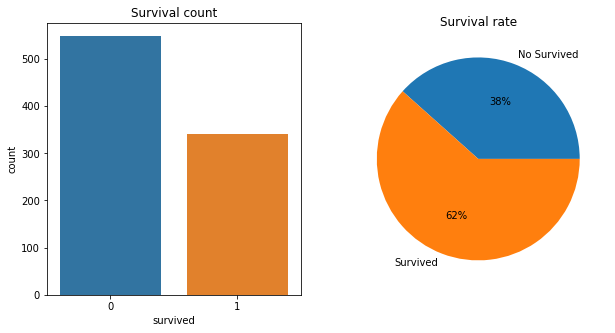

In [19]:
plt.figure(figsize = (10,5))
plt.subplot(121)
sb.countplot(x='survived', data=titanic)
plt.title('Survival count')

plt.subplot(122)
plt.pie([sum(titanic["survived"]), 891-sum(titanic["survived"])],
        labels=['No Survived','Survived'],autopct='%1.0f%%')
plt.title('Survival rate') 

plt.show()

- 性别和年龄

登船的这891人中有577名男性，314名女性，占比分别为64.76%和35.24%。而幸存的342人中有男性109人，女性233人，占比31.87%和68.13%。幸存的男性中成年男性占大多数，达到了80.73%

In [20]:
print(sum(titanic["sex"] == "male"))
print(sum(titanic["sex"] == "female"))
print("the proportion of male on board is "+str(sum(titanic["sex"] == "male")/891))
print("the proportion of female on board is "+str(sum(titanic["sex"] == "female")/891))

tmp = titanic.loc[titanic["survived"]==1]
print(sum(tmp["sex"] == "male"))
print(sum(tmp["sex"] == "female"))
print("however, the proportion of male in survivals is "+
     str(sum(tmp["sex"] == "male")/tmp.shape[0]))
print("in which, the proportion of adult male is "+
     str(sum(tmp["adult_male"])/sum(tmp["sex"] == "male")))

print("and the proportion of female that survived is "+
     str(sum(tmp["sex"] == "female")/tmp.shape[0]))

577
314
the proportion of male on board is 0.6475869809203143
the proportion of female on board is 0.35241301907968575
109
233
however, the proportion of male in survivals is 0.31871345029239767
in which, the proportion of adult male is 0.8073394495412844
and the proportion of female that survived is 0.6812865497076024


样本中登船的儿童占样本总数的9.31%，而幸存者中儿童占比为14.32%，儿童也是幸存比例高于登船比例的群体。


In [21]:
print(sum(titanic["who"]=="child")/891)
print(sum(tmp["who"]=="child")/342)

0.0931537598204265
0.14327485380116958


那么其他年龄段呢？从直观上看，年龄在20-30之间的乘客存活率最低。

In [22]:
print(max(titanic["age"]))

80.0


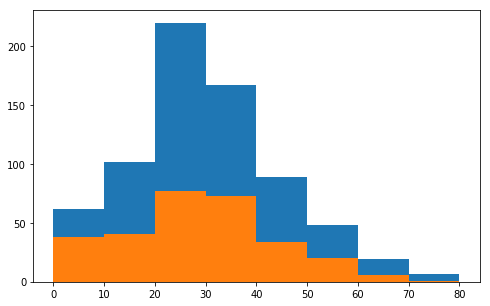

In [23]:
s = [i*10 for i in range(9)]

plt.figure(figsize=(8, 5))
plt.hist(titanic["age"], bins=s)
plt.hist(tmp["age"], bins=s)

plt.show()

如果我们分性别观察，会发现在各个年龄段女性的存活率都是显著高于男性的。

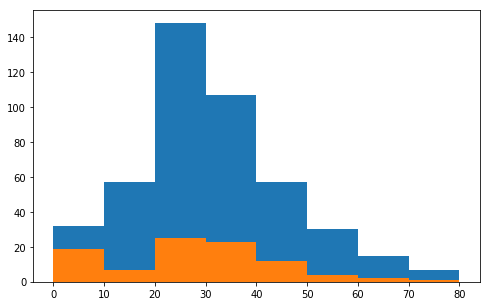

In [24]:
plt.figure(figsize=(8, 5))
plt.hist(titanic.loc[titanic["sex"]=="male"]["age"], bins=s)
plt.hist(tmp.loc[tmp["sex"]=="male"]["age"], bins=s)

plt.show()

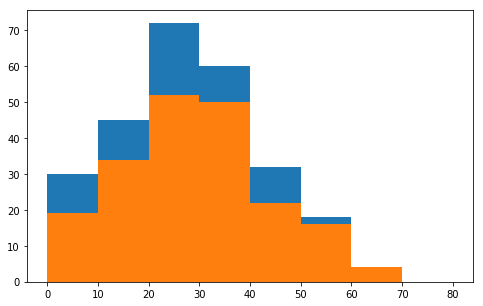

In [25]:
plt.figure(figsize=(8, 5))
plt.hist(titanic.loc[titanic["sex"]=="female"]["age"], bins=s)
plt.hist(tmp.loc[tmp["sex"]=="female"]["age"], bins=s)

plt.show()

- 舱位等级

发现样本中原本有接近一半的乘客乘坐三等舱，而幸存者中一等舱的比例明显上升且反超三等舱。说明不同阶层的乘客生还概率是不同的。

因为舱位等级和票价挂钩，所以票价和存活率应该也会显示类似的规律。

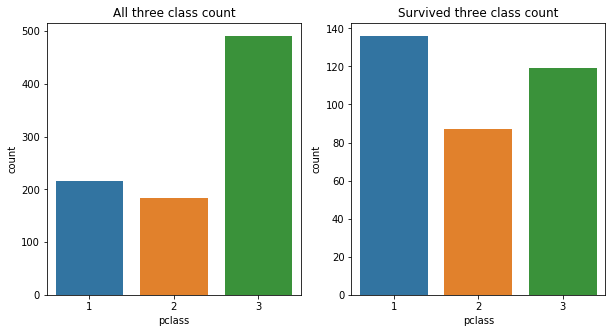

In [26]:
plt.figure(figsize = (10,5))
plt.subplot(121)
sb.countplot(x='pclass', data=titanic)
plt.title('All three class count')

plt.subplot(122)
sb.countplot(x='pclass', data=tmp)
plt.title('Survived three class count') 

plt.show()

- 上船地点

直觉告诉我们，不同的上船地点人们的贫富程度是会有差异的，而这种差异和联系则不会像票价和舱位等级那样直接。所以我们通过对不同上船地点的票价做箱线图，发现三个登船地点的乘客贫富程度大概是C = Cherbourg > Q = Queenstown > S = Southampton。

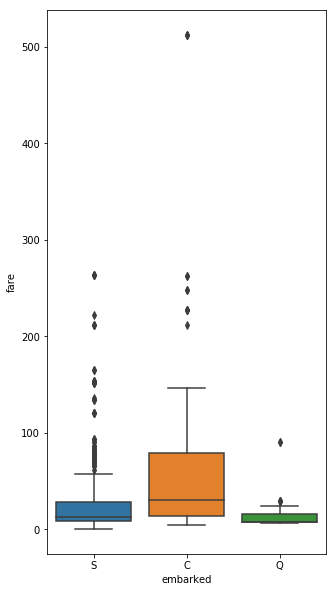

In [27]:
plt.figure(figsize = (5,10))
ax = sb.boxplot(x="embarked", y="fare", data=titanic)

- 父母兄弟姐妹子女

最后两个直觉上对生存可能性影响较大的变量大概就是*sibsp*和*parch*。

通过画图我们也容易发现有一个兄弟姐妹的存活率大概是50%，而独自登船的存活率大概只有1/3。

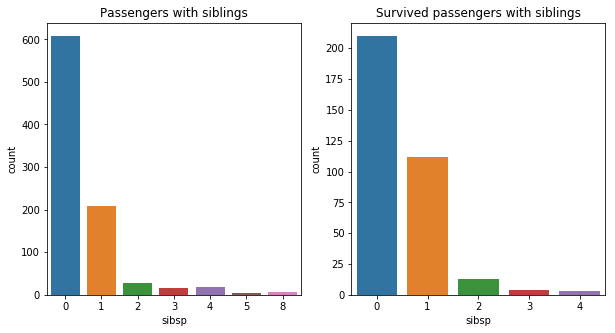

In [28]:
plt.figure(figsize = (10,5))
plt.subplot(121)
sb.countplot(x='sibsp', data=titanic)
plt.title('Passengers with siblings')

plt.subplot(122)
sb.countplot(x='sibsp', data=tmp)
plt.title('Survived passengers with siblings')

plt.show()

通过对样本总体和存活部分的*parch*画柱形图，我们可以发现有父母子女也会略微提高生存概率。

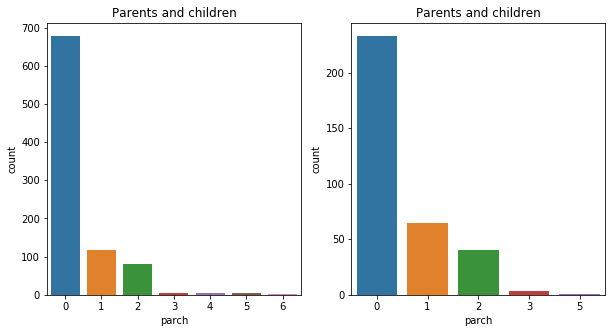

In [29]:
plt.figure(figsize = (10,5))
plt.subplot(121)
sb.countplot(x='parch', data=titanic)
plt.title('Parents and children')

plt.subplot(122)
sb.countplot(x='parch', data=tmp)
plt.title('Parents and children')

plt.show()

那么是否就意味着有人陪着上船就能帮助人求生呢？从图形上看，答案是肯定的。

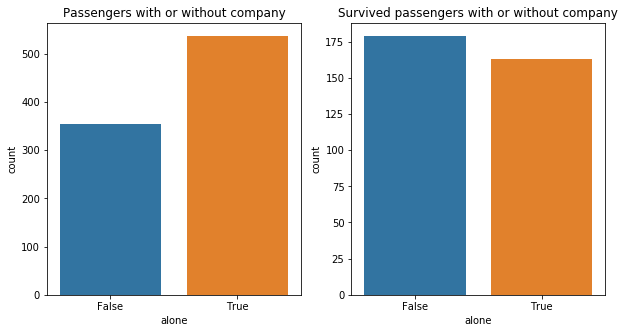

In [30]:
plt.figure(figsize = (10,5))
plt.subplot(121)
sb.countplot(x='alone', data=titanic)
plt.title('Passengers with or without company')

plt.subplot(122)
sb.countplot(x='alone', data=tmp)
plt.title('Survived passengers with or without company')

plt.show()

那么我们来计算一下既没有父母子女也没有兄弟姐妹的乘客幸存率和有兄弟姐妹或有父母子女的乘客幸存率。

首先简单验证一下*alone*的定义是否表示该乘客独自一个人在船上，结果发现二者是一致的，且这样的乘客有537人。

计算结果也显示有陪伴的乘客幸存率为50.56%，而独自上船的乘客幸存率仅为30.35%

In [31]:
titanic.loc[titanic["alone"]==True].index

Int64Index([  2,   4,   5,   6,  11,  12,  14,  15,  17,  19,
            ...
            877, 878, 881, 882, 883, 884, 886, 887, 889, 890],
           dtype='int64', length=537)

In [32]:
titanic.loc[(titanic["sibsp"]==0) & (titanic["parch"]==0)].index

Int64Index([  2,   4,   5,   6,  11,  12,  14,  15,  17,  19,
            ...
            877, 878, 881, 882, 883, 884, 886, 887, 889, 890],
           dtype='int64', length=537)

In [33]:
print("the passengers without company will survive at the rate of "+
     str(sum(titanic.loc[titanic["alone"]==True]["survived"])/537))

print("while the passengers with company will survive at the rate of "+
     str(sum(titanic.loc[titanic["alone"]==False]["survived"])/(891-537)))

the passengers without company will survive at the rate of 0.30353817504655495
while the passengers with company will survive at the rate of 0.5056497175141242


- deck?

至此，有明确、实际、可解释含义的变量已经被我们描述一番。

理论上描述统计也差不多应该告一阶段。

然而对于有经验的人来说，*deck*变量完全可以是一个强特征，也就是对生存率有重要影响，或者说样本总体和生存群体中*deck*的分布是不同的。这么说的依据就是因为它有很大程度的缺失，缺失数据的样本甚至远超有数据的样本，所以我们以*deck*变量是否缺失作为一个新变量，来检验是否会对生存率有明显影响。

（事实上这个真的是经验之谈，之前的经验证明，越是遇到缺失特别多的数据越可能会对模型有意想不到的帮助）

In [21]:
tmp["deck_NA"] = tmp["deck"].isnull()

c:\users\37922\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
titanic["deck_NA"] = titanic["deck"].isnull()

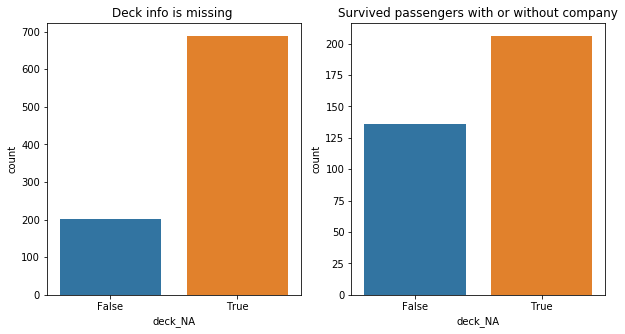

In [23]:
plt.figure(figsize = (10,5))
plt.subplot(121)
sb.countplot(x='deck_NA', data=titanic)
plt.title('Deck info is missing ')

plt.subplot(122)
sb.countplot(x='deck_NA', data=tmp)
plt.title('Survived passengers with or without company')

plt.show()

## 八、牛顿法

### 1. 和梯度下降的对比

1. 阶数不同

梯度下降被称为一阶（first-order）优化方法，因为它是通过求一阶导函数进行优化。

而牛顿法则被称为二阶（second-order）优化方法，顾名思义，用到了二阶导数。

2. 优化目标不同

梯度下降是求极值点，而牛顿法是求函数的零点。

令二者等价的方法通常是通过牛顿法求一阶导数的零点，对于原函数单调，但一阶导数有零点的函数，譬如$\frac13x^3$，牛顿法可以收敛，而梯度下降则会一直训练到超出计算机的精度范围。

### 2. 计算公式

牛顿法的思想非常朴素，就是在函数定义域上随机选取一个点，计算该点的函数值和导数值，求切线和x轴的交点，再反复迭代。

设函数为$y=f(x)$，初始点$(x_0, y_0)$，则有切线方程：

$$
y - y_0 = f'\left(x_0\right)\left(x-x_0\right)
$$

令$y=0$，求得：

$$
x_1 = x_0 - \frac{f(x_0)}{f'\left(x_0\right)}
$$

这就是牛顿法的迭代公式，如果是求函数的极值点，则只需将对应的函数$f(x)$替换成$g'(x)$即可。相比梯度下降，牛顿法用到了二阶导数的信息，不仅只看当前这一步的方向和大小，还会考虑后续的迭代信息，这就使得牛顿法比梯度下降**收敛更快**。

牛顿法另一个显著的优点是**不需设定学习率**这一超参数，节省了计算和试错成本。

但对于机器学习问题来说，我们求的通常是损失函数的极小值，也就是损失函数的导数的零点。

$$
x_{i+1} = x_i - \frac{f'(x_i)}{f''\left(x_i\right)}
$$

### 3. 高维情况

对于高维情况，我们进行对应的扩展，也就是将一阶导函数换成梯度，将二阶导函数替换成Hessian矩阵。

$$
x_{i+1} = x_i - \left[Hf\left(x_i\right)\right]^{-1}\triangledown f(x_i)
$$

在逻辑回归的例子中：

$$
\begin{split}
    x_i &= \theta_i \\
    \\
    \triangledown f(x_i) &= \frac{\triangledown loss}{\triangledown \theta}
\end{split}
$$

Hessian矩阵为：

$$
\begin{split}
    Hf\left(x_i\right) &= \begin{bmatrix}
            \frac{\partial^2 f}{\partial x_1^2} & \dots & \frac{\partial^2 f}{\partial x_1\partial x_n}\\
            \vdots & \ddots & \vdots\\
            \frac{\partial^2 f}{\partial x_n \partial x_1} & \dots & \frac{\partial^2 f}{\partial x_n^2}
        \end{bmatrix}\\
    \\
    \Rightarrow  H\left[loss\left(\hat Y\right)\right] &= \begin{bmatrix}
            \frac{\partial^2 loss}{\partial \theta _1^2} & \dots & \frac{\partial^2 loss}{\partial \theta_1\partial \theta_n}\\
            \vdots & \ddots & \vdots\\
            \frac{\partial^2 loss}{\partial \theta_n \partial \theta_1} & \dots & \frac{\partial^2 loss}{\partial \theta_n^2}
        \end{bmatrix}\\
\end{split}
$$

其中：

$$
\begin{split}
    \frac{\partial loss}{\partial \theta _m} &= -\frac1N\sum_{i=1}^N x_{im}\left(y_i - \hat y_i\right)\\
    \frac{\partial^2 loss}{\partial \theta _m \partial \theta _n} &= -\frac1N \sum_{i=1}^N \frac{\partial x_{im}\left(y_i - \hat y_i\right)}{\partial \theta_n}\\
    &= -\frac1N \sum_{i=1}^N x_{im}\frac{\partial \hat y_i}{\partial \theta_n}\\
    &= -\frac1N \sum_{i=1}^N x_{im} \left[\frac{d\hat y_i}{dz_i}\frac{\partial z_i}{\partial\theta_n}\right]\\
    &= -\frac1N \sum_{i=1}^N x_{im} \left[\hat y_i\left(1-\hat y_i\right)x_{in}\right]
\end{split}
$$

表示成矩阵形式：

$$
\begin{split}
    H\left[loss\left(\hat Y\right)\right] = X^T\left(X*\left(\left(\hat Y*\left(1-\hat Y\right)\right)1^{1\times p}\right)\right)
\end{split}
$$

其中\*是元素点乘，可能会有更巧妙的表示方法，这是我根据自己推导能够总结出来的。

## 续七、训练实例2

首先是数据处理和缺失补全。

对于缺失数据，缺失较多的*deck*用是否确实替换，缺失较少的*age*由于数据类型是浮点数，用平均值代替。

对于字符串和*sibsp*、*parch*等的整数类型，统一用onehot编码。前者这样处理很好理解，后者做这样的处理是为了更好地针对这些整数类型的不同数值进行相应处理。

### 1. onehot编码

删去titanic的*deck*列，用*deck_NA*替换。

因为pandas不支持int类型的数据进行onehot编码，所以我们需要把一部分int类型变量强制转换成object，在pandas里object就是代表字符串类型。

In [24]:
del titanic["deck"]

In [25]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
survived      891 non-null int64
pclass        891 non-null int64
sex           891 non-null object
age           714 non-null float64
sibsp         891 non-null int64
parch         891 non-null int64
fare          891 non-null float64
embarked      889 non-null object
who           891 non-null object
adult_male    891 non-null bool
alone         891 non-null bool
deck_NA       891 non-null bool
dtypes: bool(3), float64(2), int64(4), object(3)
memory usage: 65.3+ KB


In [69]:
titanic[["pclass", "sibsp", "parch"]] = titanic[["pclass", "sibsp", "parch"]].astype("object")
data = pd.get_dummies(titanic)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 31 columns):
survived      891 non-null int64
age           714 non-null float64
fare          891 non-null float64
adult_male    891 non-null bool
alone         891 non-null bool
deck_NA       891 non-null bool
pclass_1      891 non-null uint8
pclass_2      891 non-null uint8
pclass_3      891 non-null uint8
sex_female    891 non-null uint8
sex_male      891 non-null uint8
sibsp_0       891 non-null uint8
sibsp_1       891 non-null uint8
sibsp_2       891 non-null uint8
sibsp_3       891 non-null uint8
sibsp_4       891 non-null uint8
sibsp_5       891 non-null uint8
sibsp_8       891 non-null uint8
parch_0       891 non-null uint8
parch_1       891 non-null uint8
parch_2       891 non-null uint8
parch_3       891 non-null uint8
parch_4       891 non-null uint8
parch_5       891 non-null uint8
parch_6       891 non-null uint8
embarked_C    891 non-null uint8
embarked_Q    891 non-null uint8
emb

### 2. 补全缺失

In [71]:
data = data.fillna({"age":np.mean(data["age"])})
print(np.sum(np.sum(data.isnull())))

0


### 3. 用牛顿法训练模型

In [72]:
alive = data["survived"].copy()
del data["survived"]
data["bias"] = 1
n, p = data.shape

np.random.seed(2099)
index = np.random.permutation(n)
train_index = index[0: int(0.7*n)]
test_index = index[int(0.7*n): ]

In [93]:
train_data = np.array(data.iloc[train_index])
train_data = train_data.astype("float")
train_alive = np.array(alive.iloc[train_index]).reshape(len(train_index), 1)

np.random.seed(2038)
theta = initialize(p)/100
print(train_data.shape, theta.shape, train_alive.shape)

train_y_hat = sigmoid(train_data, theta)
print(loss(train_alive, train_y_hat))

(623, 31) (31, 1) (623, 1)
[[0.78356242]]


In [94]:
def train_newton(y, x, theta, sigma=1e-6):
    decay = 1
    loss_pre = None
    loss_aft = float("inf")
    y_hat = sigmoid(x, theta)
    n = x.shape[0]
    
    while decay > sigma:
        first_order = -np.dot(x.T, 1/n*(y_hat - y))
        second_order = np.dot(x.T, x*(y_hat)*(1-y_hat))
        
        delta = np.dot(np.linalg.inv(second_order), first_order)
        tmp = theta.copy()
        theta -= delta
        y_hat = sigmoid(x, theta)
        
        loss_pre = loss_aft
        loss_aft = loss(y, y_hat)
        #print(loss_aft)
        decay = loss_pre - loss_aft
        print(decay, loss_aft)
        if decay < 0:
            return tmp, loss_pre
    return theta, loss_aft

theta_newton, train_loss_newton = train_newton(train_alive, train_data, theta)

[[inf]] [[0.78825625]]
[[0.03698704]] [[0.75126921]]
[[-0.03961307]] [[0.79088229]]


In [95]:
print(train_loss_newton)

[[0.75126921]]


In [96]:
np.random.seed(2038)
theta = initialize(p)/100
theta_sgd, train_loss_sgd = train(train_alive, train_data, theta, step=0.001)

In [97]:
print(train_loss_newton, train_loss_sgd)

[[0.75126921]] [[0.62344033]]


通过比较我们可以发现，用牛顿法求到的参数设置比梯度下降法更优。

这里的比较是有意义的，因为在我们初始化参数前时都统一设置了随即种子，保证两个算法的起点是相同的。

接下来我们再比较一下在测试集上的表现。

In [98]:
test_data = np.array(data.iloc[test_index])
test_data = test_data.astype("float")
test_alive = np.array(alive.iloc[test_index]).reshape(len(test_index), 1)

test_y_hat_newton = sigmoid(test_data, theta_newton)
test_loss_newton = loss(test_alive, test_y_hat_newton-1e-16)

test_y_hat_sgd = sigmoid(test_data, theta_sgd)
test_loss_sgd = loss(test_alive, test_y_hat_sgd)

print(test_loss_newton, test_loss_sgd)

[[0.76747635]] [[0.62034863]]


In [110]:
print(np.mean(test_y_hat_newton), np.mean(test_y_hat_sgd), np.mean(test_alive))
print(precision(test_alive, test_y_hat_newton>0.5), precision(test_alive, test_y_hat_sgd>0.5))
print(recall(test_alive, test_y_hat_newton>0.5), recall(test_alive, test_y_hat_sgd>0.5))
print(F1(test_alive, test_y_hat_newton>0.5), F1(test_alive, test_y_hat_sgd>0.5))

0.5584021193015484 0.42481658575800113 0.30597014925373134
0.29464285714285715 0.46153846153846156
0.8048780487804879 0.36585365853658536
0.4313725490196078 0.4081632653061224


|优化方法|查准率|召回率|F1    |
|--------|------|------|------|
|梯度下降|46.15%|36.59%|0.4081|
|牛顿法  |29.46%|80.49%|0.4314|


可以看到，用牛顿法进行训练时迭代次数只有2-3次，的确大大降低了计算成本。但是在损失函数和平均存活率方面却逊于梯度下降，而F1分数方面却相比梯度下降有所提升，召回率相比梯度下降明显提升。

考虑其原因可能是因为我们的变量中稀疏变量较多、维度较高，导致局部极值点增多或导函数的零点增多。

而且牛顿法对初值也很敏感，当随机种子为*2099*时，用牛顿法的测试集和训练集损失会高达0.95。所以用二阶导函数进行迭代也并不一定总会比一阶导函数迭代要好。

但梯度下降中的学习率是一个需要反复尝试然后确定的超参数，当学习率过大时会造成变量值溢出导致训练过程中出现nan的情况。而且即便是有效的，不会导致溢出的学习率也会对模型结果有影响。在这种情况下，较小的学习率0.001就比较大的学习率0.005表现更好。

### 4. 模型改善

不同的评价准则给出了不同的较优优化方法。梯度下降是较为有效的优化方法且优化较简单，我们就在梯度下降的基础上进行进一步的改善。

目前可以努力的改善方向有四个：

1. 改进补全缺失值（年龄）的方法，比如用一些聚类或回归树的方法；


2. 将年龄离散化，用智能算法（遗传算法等）寻找较优的离散方法；


3. 搜索更好的超参数设置，可以用线性搜索也可以用智能算法；


4. 对样本加权；


这四种方法中最有操作性且最有希望使性能变好的是方法1和方法4。

我们考虑第四种，这也是面对不均衡样本的首选。

回忆我们之前埋下的伏笔，总的存活率大约为30%。假设极端情况下存活率为1%，那么模型总是预测不存活就能获得很漂亮的损失函数。这也就是我们解决样本不均衡的最初动力。

面对不均衡样本呢我们有三种处理手段：

1. 重抽样：重复比例较低的样本，使其和比例较高的样本一样多；


2. 欠抽样：抽取部分重复比例较高的样本和比例较少的样本进行训练；


3. 赋权：给样本赋权，使不同比例的样本具有相同的权重；


这三种方法本质上都是更改权重使不同比例的样本在模型中发挥同样的作用。

修改原始的梯度下降训练方法，使其加入权重的因素。

修改方法就是统计正例和负例的样本数，假设负例较少，则对正例赋权值1，对负例赋权值$\frac{\# positive}{\# negtive}$。需要注意的是，赋权值是根据训练集进行赋权。如果赋权时包含了测试集的信息，则会提升模型在测试集的表现，但是对模型在实际数据上的泛化能力并没有提升，反而是降低了测试集测试模型的能力。

如果是多分类情况我们对某一类赋权的公式则是$\frac{\#\ of \ most\ frequent\ class}{\#\ of \ most\ current\ class}$

In [102]:
def train(y, x, theta, step=0.1, delta = 0.0001):
    decay = 1
    loss_pre = None
    loss_aft = float('inf')
    y_hat = sigmoid(x, theta)
    n = x.shape[0]
    pos = np.sum(y)
    neg = np.sum(1-y)
    weight = y + (1-y)*pos/neg
    
    while decay > delta:
        gradient = np.dot(x.T, (y_hat - y)/n*weight)
        
        theta -= step*gradient
        y_hat = sigmoid(x, theta)
        
        loss_pre = loss_aft
        loss_aft = loss(y, y_hat)
        decay = loss_pre-loss_aft
        
        #print(decay)
    
    return theta, loss_aft

np.random.seed(2038)
theta = initialize(p)/100
theta, train_loss = train(train_alive, train_data, theta, step = 0.001)
print(train_loss)

[[0.63388563]]


In [109]:
test_y_hat = sigmoid(test_data, theta)
test_loss = loss(test_alive, test_y_hat)

print(test_loss)
print(precision(test_alive, test_y_hat>0.5))
print(recall(test_alive, test_y_hat>0.5))
print(F1(test_alive, test_y_hat>0.5))

[[0.66014657]]
0.48148148148148145
0.47560975609756095
0.47852760736196315


可以看到，当我们对样本进行加权之后，模型在测试集和训练集的损失都有所提高，这是因为我们把模型的预测倾向从不存活到二者中立。

但是在查准率、召回率、F1分数方面我们也有了一个显著的提高，而且相比损失，F1分数和召回率的提升程度更高。说明通过加权解决样本不均衡的问题之后，我们的模型是有明显改善的。

但如果我们的评价准则是损失函数，则不一定适合用这种方法改善模型。